import the nessary libraries

In [119]:
import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import the dataset

In [120]:
dataset=pandas.read_csv('salaryData.csv')
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [121]:
x=dataset.iloc[:,:-1].values
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [122]:
y=dataset.iloc[:,1].values
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [123]:
print(dataset.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [124]:
print(dataset.shape)

(30, 2)


In [125]:
print(x.shape)

(30, 1)


In [126]:
print(y.shape)

(30,)


In [127]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [128]:
print(type(x))

<class 'numpy.ndarray'>


In [129]:
print(type(y))

<class 'numpy.ndarray'>


In [130]:
cc=dataset.corr()
print(cc)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [131]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: >

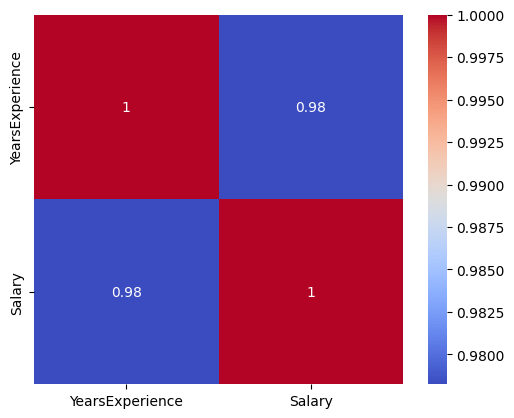

In [132]:
import seaborn as sns
#sns heatmap(data,square=True,annot=True)
sns.heatmap(cc,vmax=1,square=True,annot=True,cmap="coolwarm")

splitting the dataset into the training set and test set

we're splitting the data in 1/3 , so out of 30 rows,20rows will go into the training set and 10 rows will go to the testing set.

In [133]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=0)

creating a LinearRegression object and fitting it with our training set

In [134]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

print(lr)

LinearRegression()


In [135]:
print(xtest)
print(ytest)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]
[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


predict the test set results

In [136]:
yprediction=lr.predict(xtest) #y test y predictions

print(yprediction)
print(ytest)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]
[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


In [137]:
lr.coef_

array([9345.94244312])

In [138]:
lr.intercept_

26816.192244031183

predict

In [139]:
pred_salary=lr.predict([[6]])
print(pred_salary)

[82891.84690277]


Visualising the Training set results

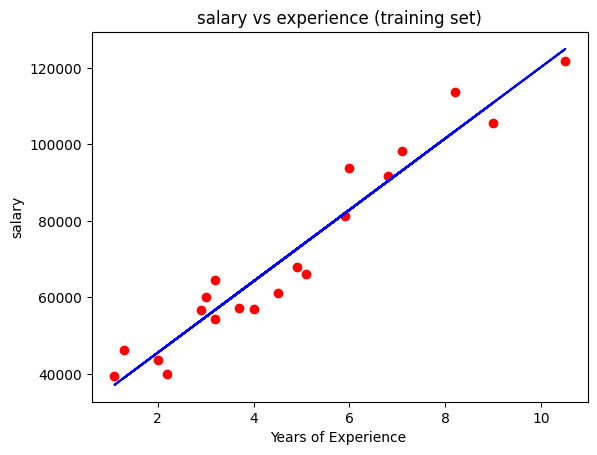

In [140]:
plot.scatter(xtrain,ytrain,color='red')
plot.plot(xtrain,lr.predict(xtrain),color='blue')
plot.title("salary vs experience (training set)")
plot.xlabel("Years of Experience ")
plot.ylabel("salary")
plot.show()

Visualising the test set results

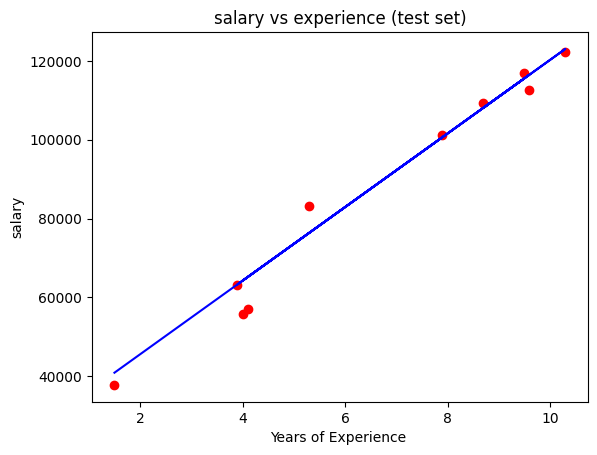

In [145]:
plot.scatter(xtest,ytest,color='Red')
plot.plot(xtest,lr.predict(xtest),color='blue') 
plot.title("salary vs experience (test set)")
plot.xlabel("Years of Experience ")
plot.ylabel("salary")
plot.show()

In [146]:
lr.predict([[4.2]])

array([66069.15050515])

In [203]:
import pickle

# Assuming your trained model is stored in the variable 'model'
# Save the model to a file
with open('salarypredict.pkl', 'wb') as file:
    pickle.dump("salarypredict.pkl", file)

In [208]:
import joblib
filename="salarypredict.pkl"


In [210]:
joblib.dump(lr,filename)

['salarypredict.pkl']

In [211]:
load_model=joblib.load(filename)

In [213]:
p=load_model.predict([[5.5]])

In [215]:
print(p)

[78218.8756812]
